# diffusers

In [ ]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline.to("cuda")

images = pipeline("An image of a squirrel in Picasso style").images
images[0]

100%|██████████| 50/50 [00:10<00:00,  4.60it/s]


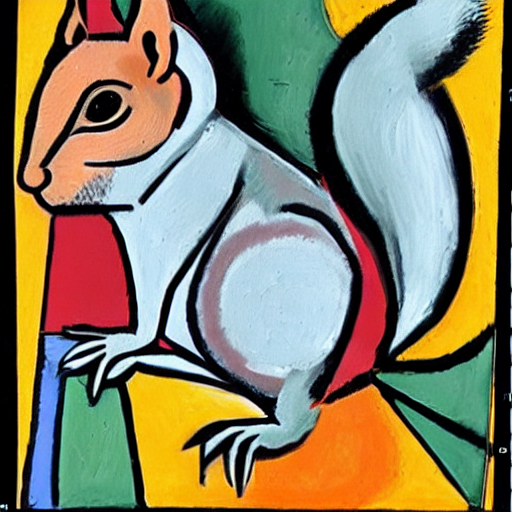

In [2]:
# pipeline("a super beautiful Chinese girl").images[0]
pipeline("a beautiful ukraine girl").images[0]

NameError: name 'pipeline' is not defined

100%|██████████| 50/50 [00:07<00:00,  7.12it/s]


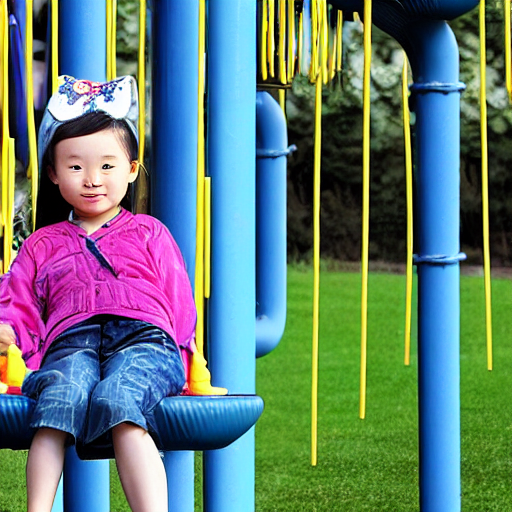

In [11]:
text = """a 7 years chinese girl in a playground"""
pipeline(text).images[0]

In [ ]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2")
pipeline.to("cuda")

100%|██████████| 50/50 [00:14<00:00,  3.37it/s]


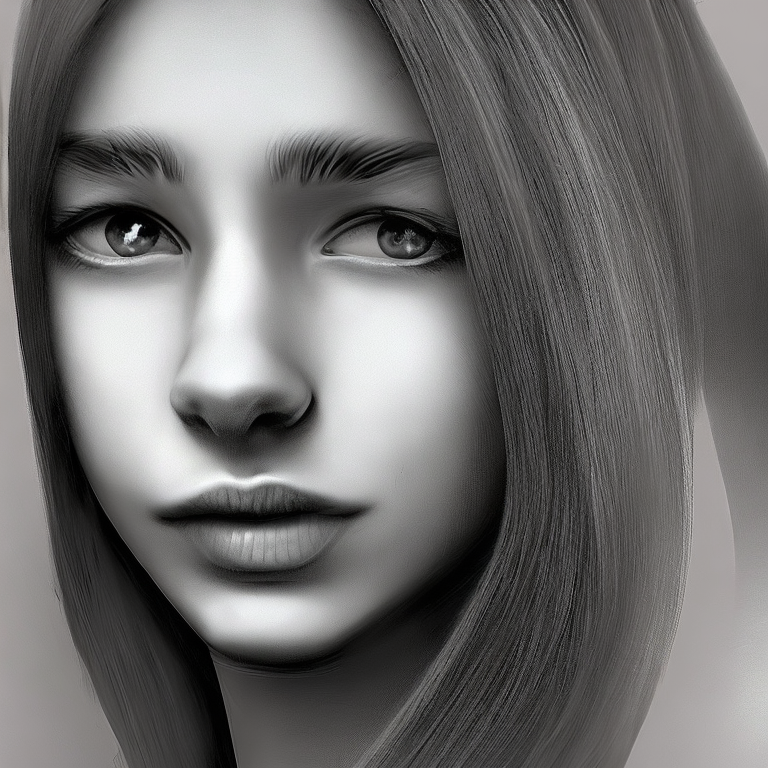

In [13]:
prompt = "generate a hyper-realistic portrait of a 16-year-old beautiful, skinny, russian woman. Use advanced image processing techniques to make the image appear as if it were a photograph taken in a high-tech city of the future, with the subject’s smile lighting up the scene."

pipeline(prompt, guidance_scale=7.5, height=768, width=768).images[0]

In [37]:
prompt = "the most beautiful and realistic,  a 20-year-old chinese girl, the image appear as if it were a photograph taken"

prompt = "a Beautiful Realistic Asian, a photograph taken"

prompt = "shut up, pretty"
prompt = "cos girls"


# pipeline(prompt, guidance_scale=9.5, height=768, width=768).images[0]
pipeline(prompt, guidance_scale=7.5, height=1080, width=1920).images[0]


 22%|██▏       | 11/50 [06:44<26:20, 40.53s/it]

In [2]:
from diffusers.models import AutoencoderKL
from diffusers import StableDiffusionPipeline
import torch

model = "CompVis/stable-diffusion-v1-4"
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse")
pipe_comp = StableDiffusionPipeline.from_pretrained(model, vae=vae, torch_dtype=torch.float16)

pipe_comp.safety_checker = lambda images, clip_input: (images, False)
pipe_comp("a beautiful ukraine girl").images[0]

safety_checker\model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\73915\AppData\Local\Temp\ipykernel_36356\622324590.py:10 in <cell line: 10>             │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ 'C:\\Users\\73915\\AppData\\Local\\Temp\\ipykernel_36356\\622324590.py'                          │
│                                                                                                  │
│ c:\Users\73915\.conda\envs\open_editor\lib\site-packages\torch\utils\_contextlib.py:115 in       │
│ decorate_context                                                                                 │
│                                                                                                  │
│   112 │   @functools.wraps(func)                                                                 │
│   113 │   def decorate_context(*args, **kwargs):                                                 │
│   114 │   │   with ctx_factory():                                                                │
│ ❱ 115 │   │   │   return func(*args, **kwargs)                                                   │
│   116 │                                                                                          │
│   117 │   return decorate_context                                                                │
│   118                                                                                            │
│                                                                                                  │
│ c:\Users\73915\.conda\envs\open_editor\lib\site-packages\diffusers\pipelines\stable_diffusion\pi │
│ peline_stable_diffusion.py:645 in __call__                                                       │
│                                                                                                  │
│   642 │   │   do_classifier_free_guidance = guidance_scale > 1.0                                 │
│   643 │   │                                                                                      │
│   644 │   │   # 3. Encode input prompt                                                           │
│ ❱ 645 │   │   prompt_embeds = self._encode_prompt(                                               │
│   646 │   │   │   prompt,                                                                        │
│   647 │   │   │   device,                                                                        │
│   648 │   │   │   num_images_per_prompt,                                                         │
│                                                                                                  │
│ c:\Users\73915\.conda\envs\open_editor\lib\site-packages\diffusers\pipelines\stable_diffusion\pi │
│ peline_stable_diffusion.py:357 in _encode_prompt                                                 │
│                                                                                                  │
│   354 │   │   │   else:                                                                          │
│   355 │   │   │   │   attention_mask = None                                                      │
│   356 │   │   │                                                                                  │
│ ❱ 357 │   │   │   prompt_embeds = self.text_encoder(                                             │
│   358 │   │   │   │   text_input_ids.to(device),                                                 │
│   359 │   │   │   │   attention_mask=attention_mask,                                             │
│   360 │   │   │   )                                                                              │
│                                                                                                  │
│ c:\Users\73915\.conda\envs\open_editor\lib\site-packages\to

In [ ]:
pipe_comp("a beautiful Chinese girl.", height=640, width=360).images[0]

## open-chat example codes

safety_checker\model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

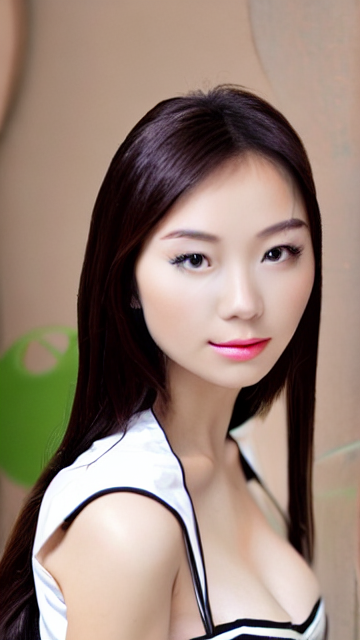

In [3]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

# model_id="stabilityai/stable-diffusion-2-1"
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "a beautiful Chinese girl."

results = pipe(prompt, height=640, width=360)
results.images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

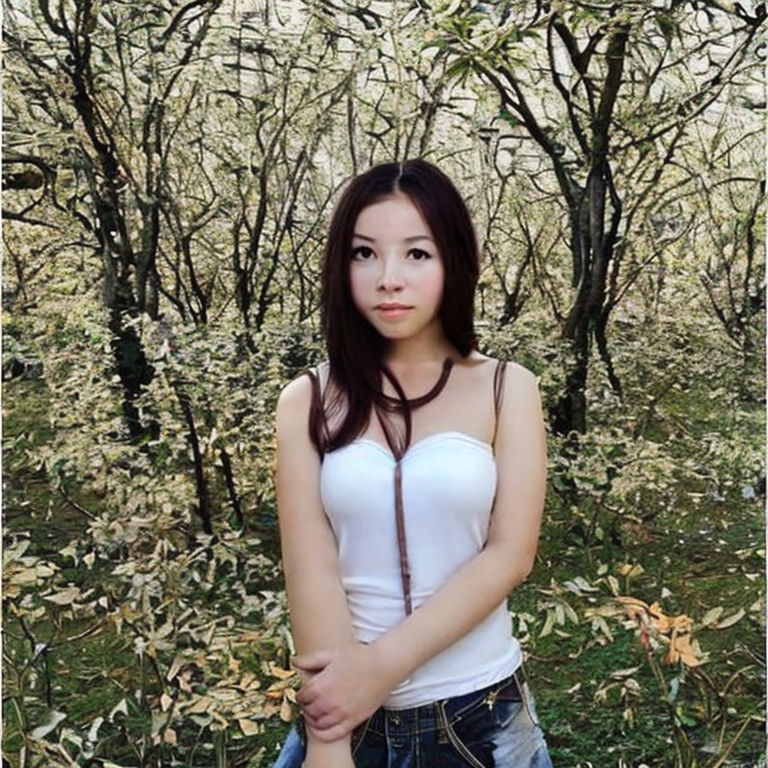

In [25]:
prompt = "a young and beautiful Chinese girl"

results = pipe("a beautiful Chinese girl.")
# results = pipe(prompt, height=512, width=512)
# results = pipe(prompt, height=640, width=360)
# results = pipe(prompt, height=1280, width=720)
results.images[0]

# PPDiffuser


c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Fetching 15 files: 100%|██████████| 15/15 [00:00<00:00, 3000.22it/s]
[2023-06-03 21:

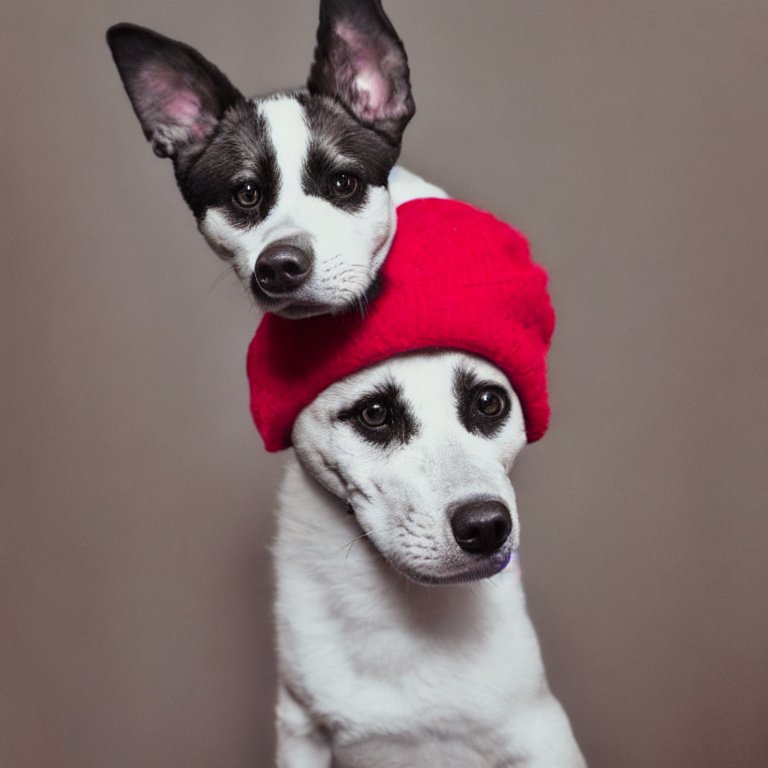

In [2]:
import paddle
from ppdiffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("BAAI/AltDiffusion-m9")

# 设置随机种子，我们可以复现下面的结果！
paddle.seed(5232132133)
prompt = "a portrait of shiba inu with a red cap growing on its head. intricate. lifelike. soft light. sony a 7 r iv 5 5 mm. cinematic post - processing "
image = pipe(prompt, guidance_scale=7.5, height=768, width=768).images[0]
image

100%|██████████| 50/50 [00:23<00:00,  2.13it/s]


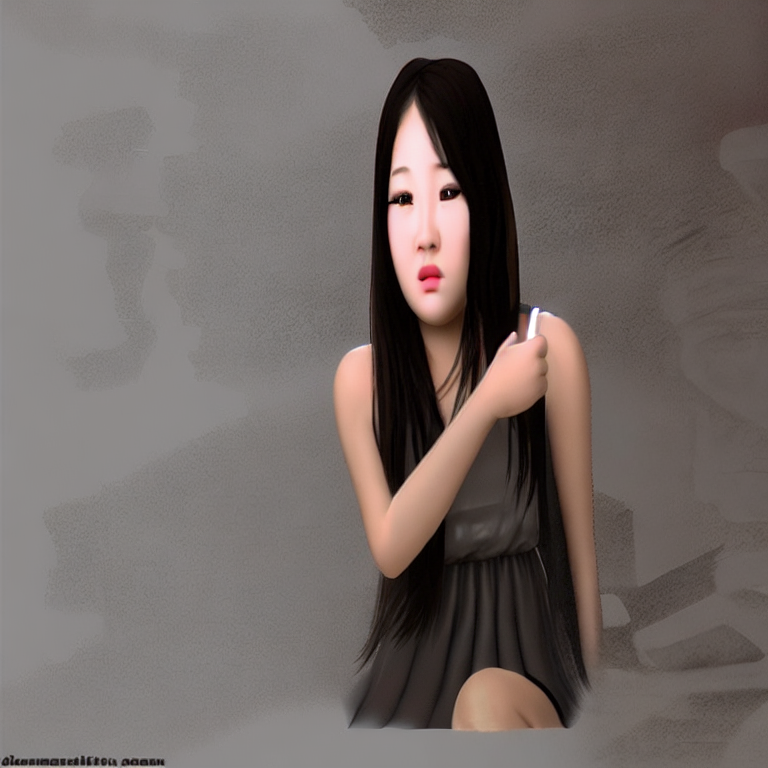

In [5]:
prompt = "asian girl, realism style"
image = pipe(prompt, guidance_scale=7.5, height=768, width=768).images[0]
image